<a href="https://colab.research.google.com/github/khairun123/ML-Linear-Regression-Assignment/blob/main/Admission_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
##Admission_Prediction_using_Machine_Learning
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
#Upload and Read file
from google.colab import drive
drive.mount("/content/drive")
Path="/content/drive/MyDrive/Datasets/Admission_Predict_Ver1.1.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv(Path)

In [27]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(500, 9)

In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
#Data cleanung
df.drop('Serial No.',axis=1,inplace=True)

df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
#Exploratory Data Aanalysis
df.describe

<bound method NDFrame.describe of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                

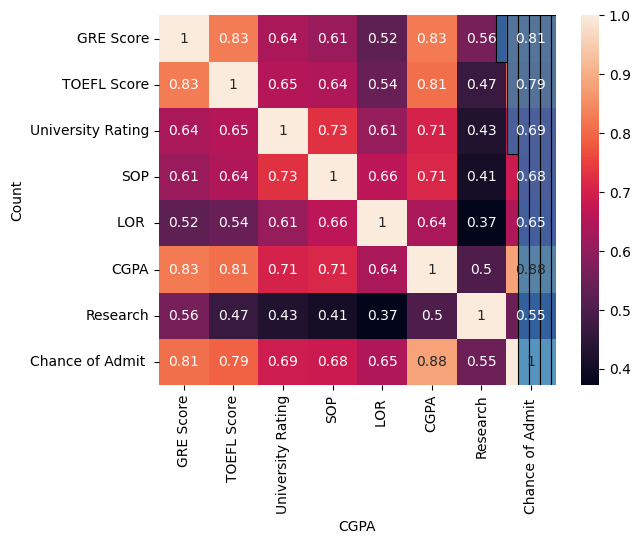

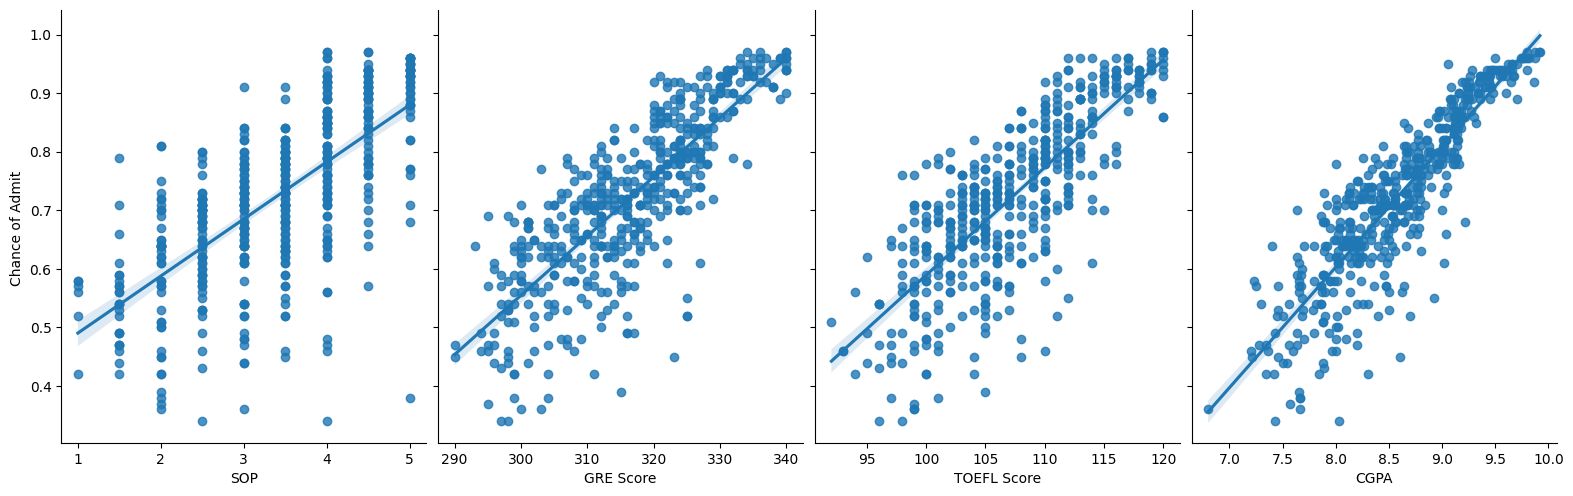

In [15]:
df.corr()

sns.heatmap(df.corr(), annot=True)

sns.histplot(df.CGPA)

sns.pairplot(df,x_vars=['SOP','GRE Score','TOEFL Score','CGPA'],y_vars=['Chance of Admit '],height=5, aspect=0.8, kind='reg')

In [17]:
#Creating model
x=df[['GRE Score', 'TOEFL Score', 'CGPA']]

y=df[['Chance of Admit ']]


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random


In [19]:

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=0)



In [20]:
x_train.shape

(400, 3)

In [21]:
y_train.shape

(400, 1)

In [22]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [23]:
#Testing and Evaluating the Model
y_pred=linreg.predict(x_test)
y_pred[:5]


array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891]])

In [24]:
y_test.head(5)

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68


In [26]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

0.04688621359385713
